In [42]:
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split


from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score

reviews_df= pd.read_csv('Amazon_Reviews.csv')

#reviews_df['Label']=reviews_df['Label'].map({'__label__2 ':1,'__label__1 ':0})

y=reviews_df['Label']

reviews_df.drop(columns='Label',axis=1,inplace=True)
reviews_df

X_train,X_test,y_train,y_test=train_test_split(reviews_df,y,random_state=42,test_size=0.2)


In [43]:
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
tokenizer = RegexpTokenizer(r'\w+')
lemmatizer = WordNetLemmatizer()
stemmer=PorterStemmer()
def preprocessing(review):
    
    final_tokens=' '
    tokens=tokenizer.tokenize(review)
    #print('Tokens:',tokens)
    pure_tokens=[token.lower() for token in tokens if token.lower() not in stopwords.words('english')]
    print('Pure Tokens:',pure_tokens)
    stemmed_tokens=[stemmer.stem(pure_token) for pure_token in pure_tokens]
    
    final_tokens=final_tokens.join(stemmed_tokens)
    
    return final_tokens


preprocessing('i am malliswari my friendship calling me malli friend')



Pure Tokens: ['malliswari', 'friendship', 'calling', 'malli', 'friend']


'malliswari friendship call malli friend'

In [47]:
X_train['Cleaned_text']=X_train['review'].apply(preprocessing)
X_train['Cleaned_text']
#X_test['Cleaned_text']=X_test['review'].apply(preprocessing)
#X_test['Cleaned_text']

KeyError: 'review'

In [33]:
len(stopwords.words('english'))

179

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer=TfidfVectorizer(stop_words='english',use_idf=True)

vectorizer.fit(x_train['Cleaned_text'])


x_train_TfIdf=vectorizer.transform(x_train['Cleaned_text'])
#x_train_TfIdf
#x_test_TfIdf=vectorizer.transform(x_test['Cleaned_text'])
#x_test_TfIdf

KeyError: 'Cleaned_text'

In [6]:
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB
from sklearn.metrics import confusion_matrix,roc_curve,roc_auc_score
import matplotlib.pyplot as plt


multinomialNB = MultinomialNB().fit(X_train_TfIdf.toarray(),y_train)

#multinomialNB.score(X_train_TfIdf.toarray(),y_train)

#test_review= 'That product was its absolute best and I loved using every feature of it'
X_test['Cleaned_text']=X_test['Review'].apply(preprocessing)

#processed_test_review


y_pred=multinomialNB.predict(X_test_tfIdf.toarray())

confusion_matrix(y_test,y_pred)

y_proba_pred=multinomialNB.predict_proba(X_test_tfIdf.toarray())[::,1]
fpr,tpr,thresholds=roc_curve(y_test,y_proba_pred)

plt.plot(fpr,tpr)

roc_auc_score(y_test,y_proba_pred)


y_pred


C:\Users\Bhavana\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


array([1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0], dtype=int64)

In [7]:
from sklearn.linear_model import  LogisticRegression

logit=LogisticRegression()
logit.fit(X_train_TfIdf,y_train)
y_logistic_pred=logit.predict(X_test_tfIdf)
y_logistic_pred

y_logistic_proba_pred=logit.predict_proba(X_test_tfIdf.toarray())[::,1]
y_logistic_proba_pred


array([0.54963681, 0.45619115, 0.627321  , 0.56830807, 0.49295162,
       0.62360099, 0.63739798, 0.66712808, 0.68048463, 0.66434554,
       0.52270575, 0.49910523, 0.5143636 , 0.47873919, 0.51662814,
       0.65390783, 0.57822738, 0.53716216, 0.44770354, 0.61004343,
       0.61421169, 0.54023245, 0.57716276, 0.63221758, 0.61348413,
       0.56843527, 0.43553873, 0.61482581, 0.57248278, 0.63428329,
       0.47126372, 0.58158021, 0.60193531, 0.7706777 , 0.62484375,
       0.66239012, 0.48887202, 0.51171646, 0.50227405, 0.45422166])

0.8426666666666667

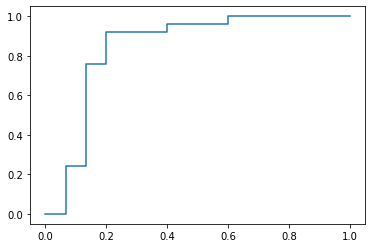

In [8]:
log_fpr,log_tpr,log_thresholds=roc_curve(y_test,y_logistic_proba_pred)

plt.plot(log_fpr,log_tpr)

roc_auc_score(y_test,y_logistic_proba_pred)


In [9]:
from sklearn.metrics import confusion_matrix,precision_score,f1_score,recall_score,accuracy_score

In [10]:
confusion_matrix(y_test,y_logistic_pred)

array([[ 8,  7],
       [ 1, 24]], dtype=int64)

In [11]:
print(precision_score(y_test,y_logistic_pred))
print(recall_score(y_test,y_logistic_pred))
print(f1_score(y_test,y_logistic_pred))
log_f1=(f1_score(y_test,y_logistic_pred))
print(accuracy_score(y_test,y_logistic_pred))

0.7741935483870968
0.96
0.8571428571428571
0.8


# DecisionTreeClassifier

In [12]:
from sklearn.tree import DecisionTreeClassifier
dec_tree=DecisionTreeClassifier()

dec_tree.fit(X_train_TfIdf,y_train)
y_dec_tree_pred=dec_tree.predict(X_test_tfIdf)
y_dec_tree_pred

y_dec_tr_proba_pred=dec_tree.predict_proba(X_test_tfIdf.toarray())[::,1]
y_dec_tr_proba_pred


array([0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1.,
       0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1.,
       1., 1., 1., 0., 1., 0.])

0.58

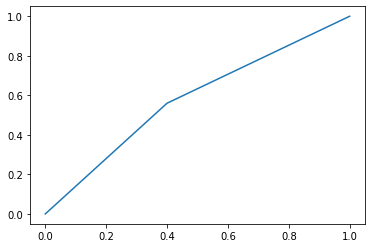

In [13]:
dec_fpr,dec_tpr,dec_thresholds=roc_curve(y_test,y_dec_tr_proba_pred)

plt.plot(dec_fpr,dec_tpr)

roc_auc_score(y_test,y_dec_tr_proba_pred)


In [14]:
from sklearn.model_selection import GridSearchCV
dec_tree=DecisionTreeClassifier()
hyper_dict={'max_depth':[2,8],
 'min_samples_split':[5,8],
 'min_samples_leaf':[7,5],
 'max_leaf_nodes':[2,5]}
gscv=GridSearchCV(estimator=dec_tree,param_grid=hyper_dict,cv=5)#creating object for gradsearch n randamised search#n_iter=
gscv.fit(X_train_TfIdf,y_train)


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [2, 8], 'max_leaf_nodes': [2, 5],
      

In [15]:
gscv.best_params_
gscv.best_score_
y_dec_tree_gscv_pred=gscv.predict(X_test_tfIdf.toarray())
y_dec_tree_gscv_pred

array([0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0], dtype=int64)

In [16]:
from sklearn.model_selection import RandomizedSearchCV
dec_tree=DecisionTreeClassifier()
hyper_dict={'max_depth':[2,8],
 'min_samples_split':[5,8],
 'min_samples_leaf':[7,5],
 'max_leaf_nodes':[2,5]}
rscv=RandomizedSearchCV(estimator=dec_tree,param_distributions=hyper_dict,cv=5,n_iter=2)#creating object for gradsearch n randamised search#n_iter=
rscv.fit(X_train_TfIdf,y_train)


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=None,
          

In [17]:
rscv.best_params_
rscv.best_score_
y_dec_tree_rscv_pred=rscv.predict(X_test_tfIdf.toarray())
y_dec_tree_rscv_pred

array([0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0], dtype=int64)

In [18]:
print(precision_score(y_test,y_dec_tree_pred))
print(recall_score(y_test,y_dec_tree_pred))
print(f1_score(y_test,y_dec_tree_pred))
dec_f1=(f1_score(y_test,y_dec_tree_pred))
print(accuracy_score(y_test,y_dec_tree_pred))

0.7
0.56
0.6222222222222222
0.575


# RandomForestClassifier

In [19]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()
rf.fit(X_train_TfIdf,y_train)
y_rf_pred=rf.predict(X_test_tfIdf)
y_rf_pred
y_rf_proba_pred=rf.predict_proba(X_test_tfIdf.toarray())[::,1]
y_rf_proba_pred


array([0.68, 0.44, 0.78, 0.73, 0.43, 0.61, 0.81, 0.67, 0.75, 0.68, 0.66,
       0.57, 0.64, 0.56, 0.41, 0.81, 0.65, 0.55, 0.56, 0.63, 0.68, 0.51,
       0.77, 0.78, 0.77, 0.6 , 0.25, 0.81, 0.65, 0.84, 0.4 , 0.72, 0.81,
       0.91, 0.76, 0.72, 0.63, 0.7 , 0.72, 0.41])

0.7786666666666667

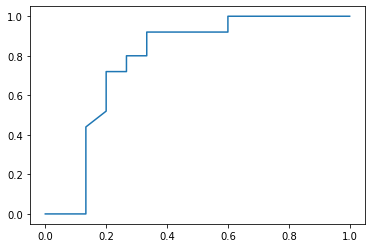

In [20]:
rf_fpr,rf_tpr,rf_thresholds=roc_curve(y_test,y_rf_proba_pred)

plt.plot(rf_fpr,rf_tpr)

roc_auc_score(y_test,y_rf_proba_pred)


In [21]:
from sklearn.model_selection import GridSearchCV
rf= RandomForestClassifier()
hyper_dict={'max_depth':[2,8],
 'min_samples_split':[5,8],
 'min_samples_leaf':[7,5],
 'max_leaf_nodes':[2,5],
 'n_estimator:[5,10]}
gscv=GridSearchCV(estimator=rf,param_grid=hyper_dict,cv=5)#creating object for gradsearch n randamised search#n_iter=
gscv.fit(X_train_TfIdf,y_train)


SyntaxError: EOL while scanning string literal (<ipython-input-21-de88ab06634d>, line 7)

In [ ]:
gscv.best_params_
gscv.best_score_
y_rf_gscv_pred=gscv.predict(X_test_tfIdf.toarray())
y_rf_gscv_pred

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
rf= RandomForestClassifier()
hyper_dict={'max_depth':[2,8],
 'min_samples_split':[5,8],
 'min_samples_leaf':[7,5],
 'max_leaf_nodes':[2,5]}
rscv=RandomizedSearchCV(estimator=rf,param_distributions=hyper_dict,cv=5,n_iter=2)#creating object for gradsearch n randamised search#n_iter=
rscv.fit(X_train_TfIdf,y_train)


In [ ]:
rscv.best_params_
rscv.best_score_
y_rf_rscv_pred=rscv.predict(X_test_tfIdf.toarray())
y_rf_rscv_pred

In [ ]:
print(precision_score(y_test,y_rf_pred))
print(recall_score(y_test,y_rf_pred))
print(f1_score(y_test,y_rf_pred))
rf_f1=(f1_score(y_test,y_rf_pred))
print(accuracy_score(y_test,y_rf_pred))

# AdaBoostClassifier 

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada= AdaBoostClassifier()
ada.fit(X_train_TfIdf,y_train)
y_ada_pred=ada.predict(X_test_tfIdf)
y_ada_pred
y_ada_proba_pred=ada.predict_proba(X_test_tfIdf.toarray())[::,1]
y_ada_proba_pred


In [ ]:
ada_fpr,ada_tpr,ada_thresholds=roc_curve(y_test,y_ada_proba_pred)

plt.plot(ada_fpr,ada_tpr)

roc_auc_score(y_test,y_ada_proba_pred)


In [ ]:
from sklearn.model_selection import GridSearchCV
ada=AdaBoostClassifier()
hyper_dict={'learning_rate':[2],
            'n_estimators':[10,20]}
gscv=GridSearchCV(estimator=ada,param_grid=hyper_dict,cv=5)#creating object for gradsearch n randamised search#n_iter=
gscv.fit(X_train_TfIdf,y_train)

In [ ]:
gscv.best_params_
gscv.best_score_
y_ada_gscv_pred=gscv.predict(X_test_tfIdf.toarray())
y_ada_gscv_pred

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
ada=AdaBoostClassifier()
hyper_dict={'learning_rate':[2],
            'n_estimators':[10,20]}
rscv=RandomizedSearchCV(estimator=ada,param_distributions=hyper_dict,cv=5,n_iter=2)#creating object for gradsearch n randamised search#n_iter=
rscv.fit(X_train_TfIdf,y_train)


In [ ]:
rscv.best_params_
rscv.best_score_
y_ada_rscv_pred=rscv.predict(X_test_tfIdf.toarray())
y_ada_rscv_pred

In [ ]:
print(precision_score(y_test,y_ada_pred))
print(recall_score(y_test,y_ada_pred))
print(f1_score(y_test,y_ada_pred))
ada_f1=(f1_score(y_test,y_ada_pred))
print(accuracy_score(y_test,y_ada_pred))

# GradientBoostingClassifier 

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gra=GradientBoostingClassifier()
gra.fit(X_train_TfIdf,y_train)
y_gra_pred=gra.predict(X_test_tfIdf)
y_gra_pred
y_gra_proba_pred=gra.predict_proba(X_test_tfIdf.toarray())[::,1]
y_gra_proba_pred


In [ ]:
gra_fpr,gra_tpr,gra_thresholds=roc_curve(y_test,y_gra_proba_pred)

plt.plot(gra_fpr,gra_tpr)

roc_auc_score(y_test,y_gra_proba_pred)




In [ ]:
from sklearn.model_selection import GridSearchCV
gra=GradientBoostingClassifier()
hyper_dict={'learning_rate':[2],
            'n_estimators':[10,20]}
gscv=GridSearchCV(estimator=gra,param_grid=hyper_dict,cv=5)#creating object for gradsearch n randamised search#n_iter=
gscv.fit(X_train_TfIdf,y_train)

In [ ]:
gscv.best_params_
gscv.best_score_
y_gra_gscv_pred=gscv.predict(X_test_tfIdf.toarray())
y_gra_gscv_pred

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
gra=GradientBoostingClassifier()
hyper_dict={'learning_rate':[2],
            'n_estimators':[10,20]}
rscv=RandomizedSearchCV(estimator=gra,param_distributions=hyper_dict,cv=5,n_iter=2)#creating object for gradsearch n randamised search#n_iter=
rscv.fit(X_train_TfIdf,y_train)


In [ ]:
rscv.best_params_
rscv.best_score_
y_gra_rscv_pred=rscv.predict(X_test_tfIdf.toarray())
y_gra_rscv_pred

In [ ]:
print(precision_score(y_test,y_gra_pred))
print(recall_score(y_test,y_gra_pred))
print(f1_score(y_test,y_gra_pred))
gra_f1=(f1_score(y_test,y_gra_pred))
print(accuracy_score(y_test,y_gra_pred))